In [274]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [276]:
iris = load_iris()

In [277]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [278]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [279]:
from IPython.display import display
data = pd.DataFrame(data=iris.get('data'), columns=iris.get('feature_names'))
display(data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


c:\Users\Srushti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Partitioned Data')

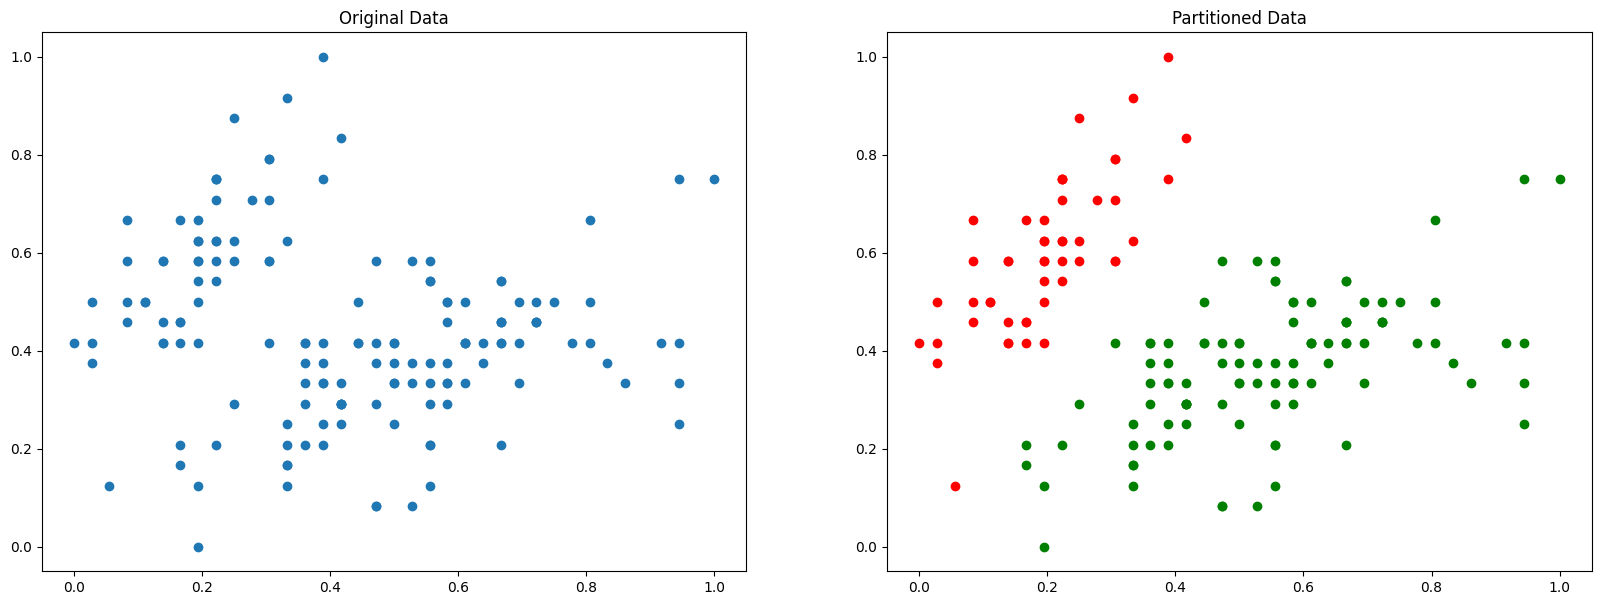

In [280]:
plt.figure(figsize=(20,7))

x = MinMaxScaler().fit_transform(data.values)
plt.subplot(121)
plt.scatter(x[:,0], x[:,1]) #first and second column of x
plt.title('Original Data')

km = KMeans(n_clusters=2)
km.fit(x)
target = km.predict(x)
colors = {0: 'r', 1:'g'}

plt.subplot(122)
for instance, tg in zip(x, target):
    plt.scatter(instance[0], instance[1], color=colors[tg])
plt.title('Partitioned Data')
    

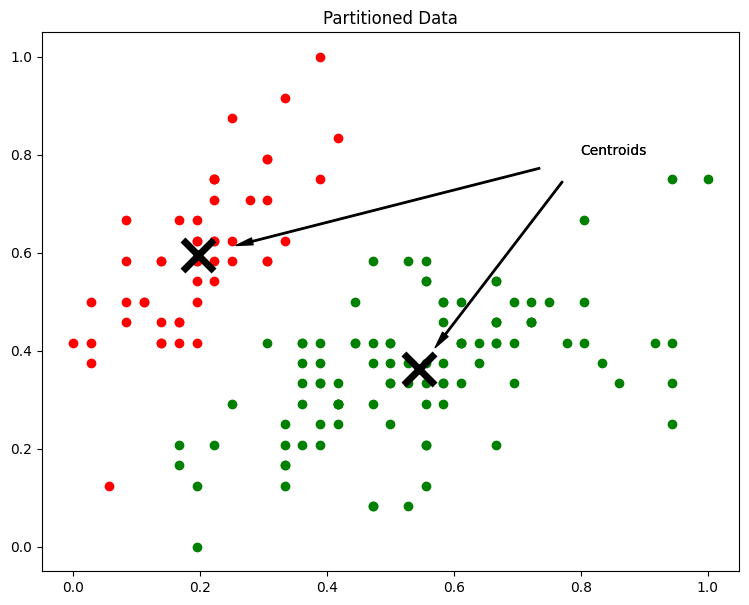

In [281]:
plt.figure(figsize=(9,7))
for instance, tg in zip(x, target):
    plt.scatter(instance[0], instance[1], color=colors[tg])
plt.title('Partitioned Data')

centroids = km.cluster_centers_ #[[0.19611111 0.595      0.07830508 0.06083333] [0.545      0.36333333 0.6620339  0.65666667]]
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='k', marker='x', lw=5, s=500)
    plt.annotate('Centroids', xytext=(0.8, 0.8), xy=(centroid[0], centroid[1]),
                arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=5))


In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.style import use
from metaheuristics.algorithm.abc import ABC
from metaheuristics.optimization.objection_function import QuantizationError
from metaheuristics.optimization.objection_function import SumOfSquaredErrors

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [283]:
def decode_centroids(centroids, n_clusters, data):
    print(data.shape[1])
    return centroids.reshape(n_clusters, data.shape[1])

In [284]:
data = MinMaxScaler().fit_transform(load_iris()['data'][:, [1,3]])

Text(0.5, 1.0, 'Original Data')

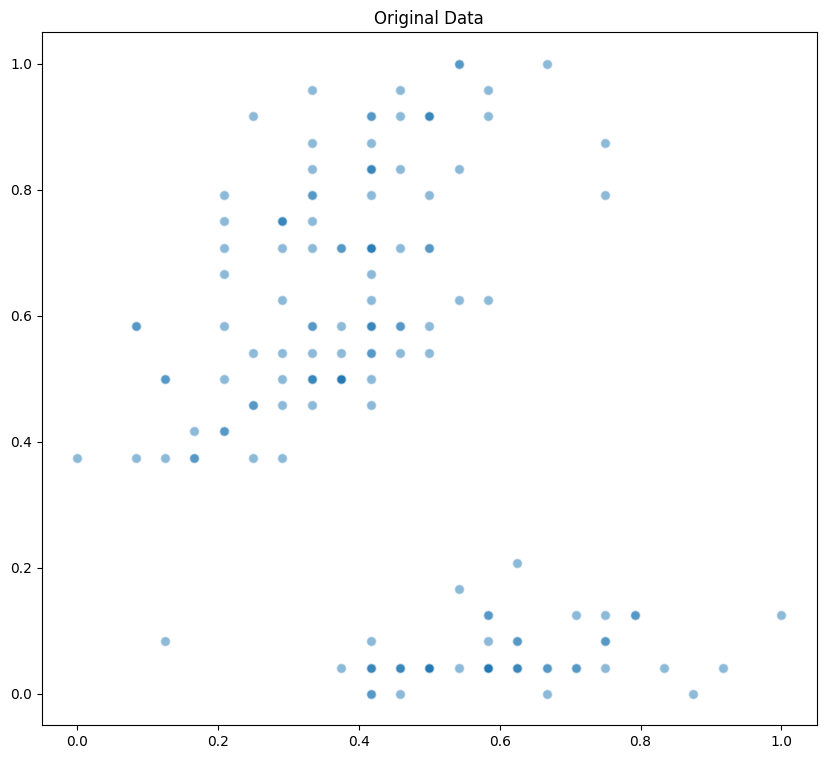

In [285]:
plt.figure(figsize=(10, 9))
plt.scatter(data[:,0], data[:,1], s=50, edgecolor='w', alpha=0.5)
plt.title('Original Data')

Text(0.5, 1.0, 'Original Groups')

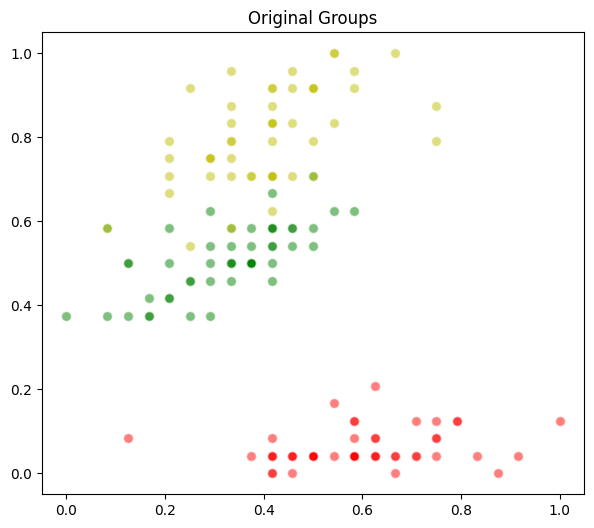

In [286]:
colors = ['r', 'g', 'y']
target = load_iris()['target']


plt.figure(figsize=(7,6))
for instance, tgt in zip(data, target):
    plt.scatter(instance[0], instance[1], s=50,
                edgecolor='w', alpha=0.5, color=colors[tgt])
plt.title('Original Groups')

In [287]:
objective_function = SumOfSquaredErrors(dim=6, n_clusters=3, data=data)
optimizer = ABC(obj_function=objective_function, colony_size=30, n_iter=300, max_trials=100)
optimizer.optimize()

iter: 0 = cost: 6.900e+00
iter: 1 = cost: 6.900e+00
iter: 2 = cost: 6.900e+00
iter: 3 = cost: 6.900e+00
iter: 4 = cost: 6.900e+00
iter: 5 = cost: 6.900e+00
iter: 6 = cost: 6.900e+00
iter: 7 = cost: 6.900e+00
iter: 8 = cost: 6.900e+00
iter: 9 = cost: 6.900e+00
iter: 10 = cost: 6.900e+00
iter: 11 = cost: 6.900e+00
iter: 12 = cost: 6.900e+00
iter: 13 = cost: 6.900e+00
iter: 14 = cost: 6.900e+00
iter: 15 = cost: 6.900e+00
iter: 16 = cost: 6.900e+00
iter: 17 = cost: 6.900e+00
iter: 18 = cost: 6.900e+00
iter: 19 = cost: 6.900e+00
iter: 20 = cost: 6.900e+00
iter: 21 = cost: 6.900e+00
iter: 22 = cost: 6.900e+00
iter: 23 = cost: 6.900e+00
iter: 24 = cost: 6.900e+00
iter: 25 = cost: 6.900e+00
iter: 26 = cost: 6.900e+00
iter: 27 = cost: 6.900e+00
iter: 28 = cost: 6.900e+00
iter: 29 = cost: 6.900e+00
iter: 30 = cost: 6.900e+00
iter: 31 = cost: 6.900e+00
iter: 32 = cost: 6.900e+00
iter: 33 = cost: 6.900e+00
iter: 34 = cost: 6.900e+00
iter: 35 = cost: 6.900e+00
iter: 36 = cost: 6.900e+00
iter: 37 = 

In [288]:
centroids = dict(enumerate(decode_centroids(optimizer.optimal_solution.pos, n_clusters=3, data=data)))
print(centroids)

2
{0: array([0.39391588, 0.83738299]), 1: array([0.78879801, 0.21764893]), 2: array([0.38401566, 0.50653629])}


In [289]:
def assign_centroid(centroids, point):
    distances = [np.linalg.norm(point - centroids[idx]) for idx in centroids]
    return np.argmin(distances)

In [290]:
custom_tgt = []
for instance in data:
    custom_tgt.append(assign_centroid(centroids, instance))

Text(0.5, 1.0, 'Partitioned Data found by ABC')

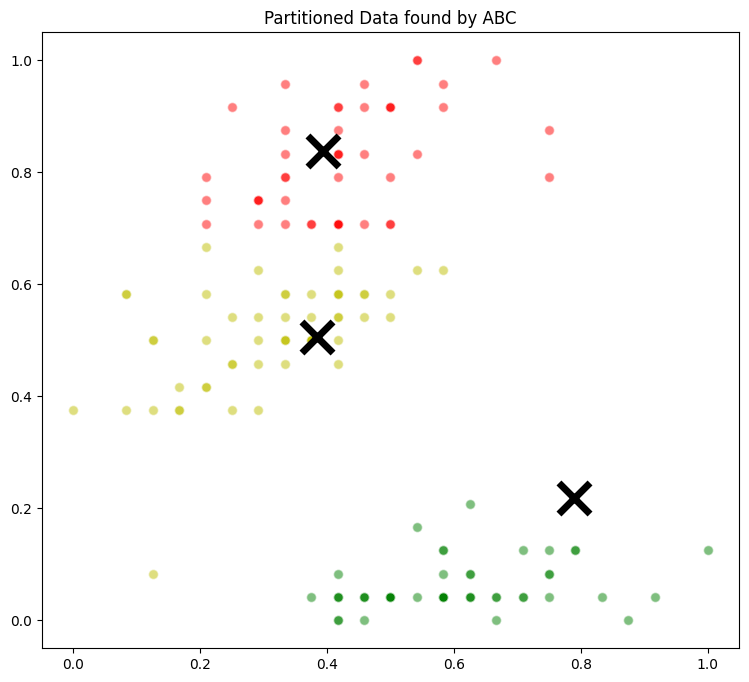

In [291]:
colors = ['r', 'g', 'y']
plt.figure(figsize=(9,8))
for instance, tgt in zip(data, custom_tgt):
    plt.scatter(instance[0], instance[1], s=50, edgecolor='w', alpha=0.5, color=colors[tgt])

for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1],
                color='k', marker='x', lw=5, s=500)
plt.title('Partitioned Data found by ABC')

Text(0.5, 0, 'Iteration')

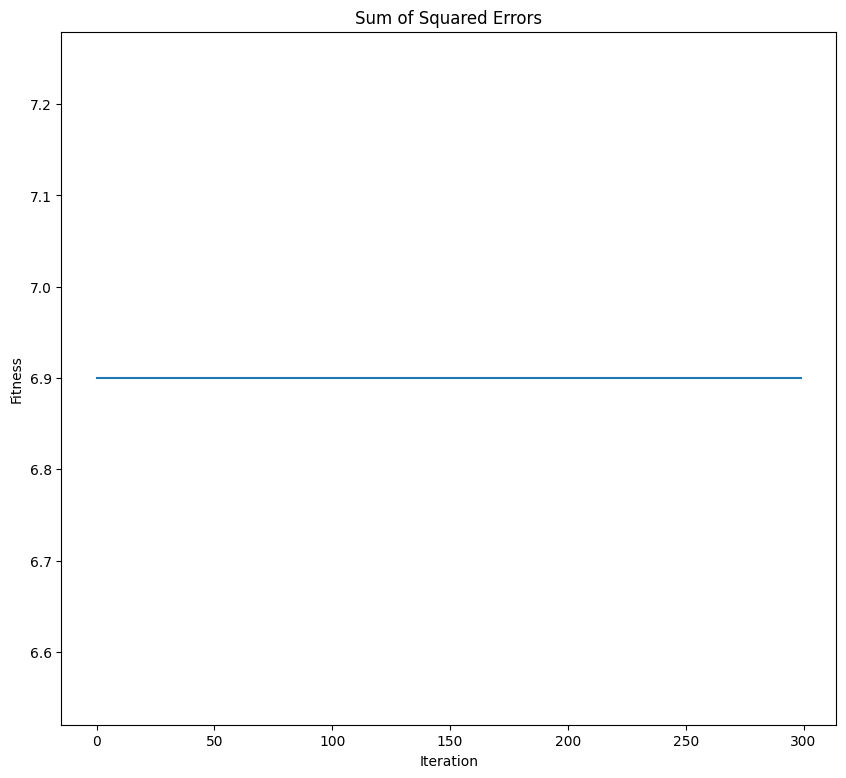

In [292]:
itr = range(len(optimizer.optimality_tracking))
val = optimizer.optimality_tracking
plt.figure(figsize=(10, 9))
plt.plot(itr, val)
plt.title('Sum of Squared Errors')
plt.ylabel('Fitness')
plt.xlabel('Iteration')